In [1]:
# Produce model GOES class as a function of isothermal T and EM
# 
# 01-Sep-2023 IGH

In [2]:
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy import interpolate
import goesxrs_temp as gtem

import warnings
warnings.simplefilter('ignore')
# Just setup plot fonts
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [3]:
# Load in GOES response
# Resp units are 10^{-55} W m^{-2} cm^{3}
resps, resptmk=gtem.get_resps(sat=15)

In [4]:
# Work out resp at tmk values
# scipy interpolate does this by creating a function
resp_func18=interpolate.interp1d( resptmk,1e-55*resps[:,0],kind='cubic')

In [5]:
# setup the T, EM and output 1-8A flux arrays
nem=100
ems=np.logspace(42,50,num=nem)
nt=100
tmks=1e-6*np.logspace(np.log10(2e6),np.log10(5e7),num=nt)

fl18s=np.zeros((nem,nt))

In [6]:
#  Calculate flux for each T, EM 
for ee in range(nem):
    for tt in range (nt):
        fl18s[ee,tt]=ems[ee]*resp_func18(tmks[tt]) 

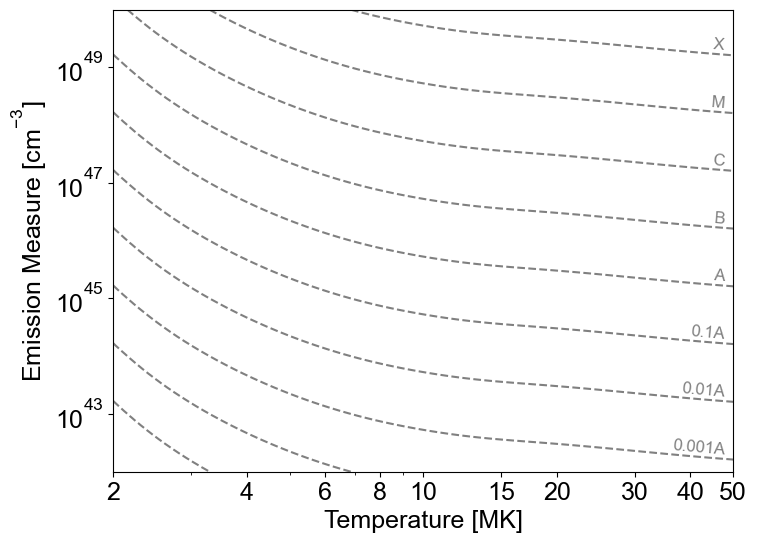

In [7]:
# Plot as contours for the different flare classes

fig,ax = plt.subplots(figsize=(8, 6))
cs=plt.contour(tmks,ems,fl18s,[1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4],\
            origin='lower',colors='grey',linestyles='dashed')
plt.xscale('log')
plt.yscale('log')
ax.set_xticks([2,4,6,8,10,15,20,30,40,50])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
strs = ['0.001A','0.01A','0.1A','A', 'B', 'C', 'M', 'X']
i=0
for s in strs:
    plt.text(48,10**(42.3+i),s,color='grey',fontsize=12,ha='right',rotation=-5)
    i=i+1
ax.set_xlabel('Temperature [MK]')
ax.set_ylabel('Emission Measure [cm$^{-3}$]')
plt.show()